##**Import the Data**##

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('chatgpt.csv')
df.head(10)

,Id,Date,Username,Tweet,Raw
0,1.634610e+18,3/12/23 0:58,irfnannt,chat gpt ni membantu penulisan tugas,chat gpt ni sangat membantu dalam penulisan tu...
1,1.634560e+18,3/11/23 21:14,poetrypetal,gatau berterimakasih jd ngerasa males kalo nge...,aku gatau harus berterimakasih atau jd ngerasa...
2,1.634530e+18,3/11/23 19:04,ut_hkg,ai kecemasan pekerjaan kemunculan chatgpt dian...,AI dan Kecemasan Masa Depan Terhadap Pekerjaan...
3,1.634510e+18,3/11/23 18:03,ailurost,wkwkwkwkwk chatgpt akumah tugas,@nealullaby @r__yld WKWKWKWKWK CHATGPT AKUMAH ...
4,1.634390e+18,3/11/23 10:07,sevlgii,chat gpt memudahkan tugas tugas ku hihi,chat gpt memudahkan tugas tugas ku hihi
5,1.634350e+18,3/11/23 7:45,addday04,chatgpt berguna bgt diskusi tugas kuliah,Chatgpt berguna bgt buat diskusi tugas kuliah 🥳🥳🥳
6,1.634210e+18,3/10/23 22:17,kompasiana,ingar bingar chatgpt tugas guru berat,Ingar-Bingar ChatGPT: Tugas Guru Semakin Berat...
7,1.634010e+18,3/10/23 8:37,hasfiihasabii,si mahasiswanya membaca ulang memahami materi ...,@13persen @Strategi_Bisnis sebenarnya kalau si...
8,1.633830e+18,3/9/23 21:07,stfuch__,chatgpt membantu skli tugas mode sks,Chatgpt membantu skli mengerjakan tugas mode s...
9,1.633810e+18,3/9/23 19:29,collegemenfess,cm semenjak chatgpt refrensi tugas bergunaa b...,[cm] semenjak ada chatgpt aku ada refrensi ter...


In [ ]:
df.shape

(16970, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16970 entries, 0 to 16969
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        16970 non-null  float64
 1   Date      16970 non-null  object 
 2   Username  16970 non-null  object 
 3   Tweet     16969 non-null  object 
 4   Raw       16970 non-null  object 
dtypes: float64(1), object(4)
memory usage: 663.0+ KB


##**Analisis Sentimen**##

In [ ]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
import textblob.exceptions
import swifter

def getTranslate(text):
  blob = TextBlob(text)
  try:
    blob.translate(from_lang = 'id', to='en')
  except textblob.exceptions.NotTranslated:
    word=" "
    blob = blob + word + " "
  return blob

def getPolarity(text):
   return TextBlob(text).sentiment.polarity

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

df['Tweet'] = df['Tweet'].astype(str)
df['Tweet'] = df['Tweet'].swifter.apply(getTranslate)
df['Tweet'] = df['Tweet'].astype(str)
df['Subjectivity'] = df['Tweet'].swifter.apply(getSubjectivity)
df['Polarity'] = df['Tweet'].swifter.apply(getPolarity)
df['Sentiment'] = df['Polarity'].swifter.apply(getAnalysis)

Pandas Apply:   0%|          | 0/16970 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16970 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16970 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16970 [00:00<?, ?it/s]

In [ ]:
df

,Id,Date,Username,Tweet,Raw,Subjectivity,Polarity,Sentiment
0,1.634610e+18,3/12/23 0:58,irfnannt,chat gpt ni membantu penulisan tugas,chat gpt ni sangat membantu dalam penulisan tu...,0.0,0.0,Neutral
1,1.634560e+18,3/11/23 21:14,poetrypetal,gatau berterimakasih jd ngerasa males kalo nge...,aku gatau harus berterimakasih atau jd ngerasa...,0.0,0.0,Neutral
2,1.634530e+18,3/11/23 19:04,ut_hkg,ai kecemasan pekerjaan kemunculan chatgpt dian...,AI dan Kecemasan Masa Depan Terhadap Pekerjaan...,0.0,0.0,Neutral
3,1.634510e+18,3/11/23 18:03,ailurost,wkwkwkwkwk chatgpt akumah tugas,@nealullaby @r__yld WKWKWKWKWK CHATGPT AKUMAH ...,0.0,0.0,Neutral
4,1.634390e+18,3/11/23 10:07,sevlgii,chat gpt memudahkan tugas tugas ku hihi,chat gpt memudahkan tugas tugas ku hihi,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...
16965,1.598240e+18,12/1/22 15:51,annourcharity,iyah rindu kpd senior eh nya kyk berbulan bula...,@Siajapul Iyah.... Rindu kpd semua Senior eh.....,0.0,0.0,Neutral
16966,1.598240e+18,12/1/22 15:48,annourcharity,bgtu abangnda syarif pan nour menghilang haria...,@Siajapul Bukan bgtu..... Abangnda Syarif @Sia...,0.0,0.0,Neutral
16967,1.598240e+18,12/1/22 15:45,annourcharity,tatum tunisia kross poland chatgpt nyimak,@Siajapul #UmatBersatuRezimBisu\n#UmatBersatuR...,0.0,0.0,Neutral
16968,1.598220e+18,12/1/22 14:34,kamal,chatgpt making rais yatim proud boleh cakap me...,ChatGPT making Rais Yatim proud. “Boleh cakap ...,1.0,0.8,Positive


In [ ]:
df['Sentiment'].value_counts()

Neutral     14686
Positive     1721
Negative      563
Name: Sentiment, dtype: int64

In [ ]:
print(df['Subjectivity'].min(), df['Subjectivity'].max())

0.0 1.0


##**Word Cloud**##

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


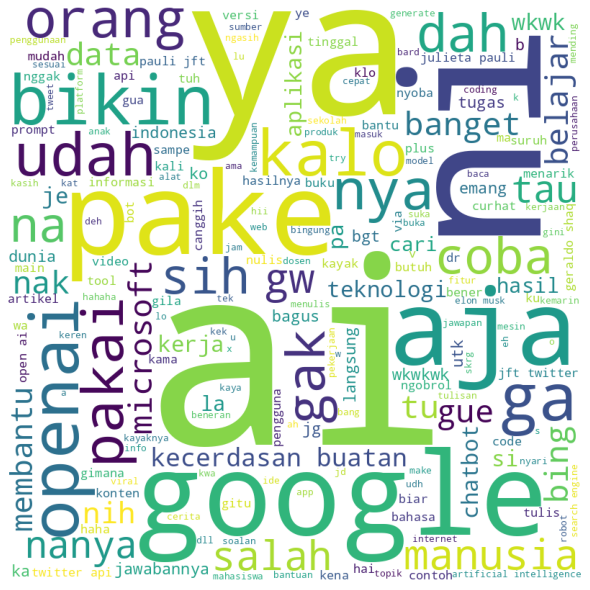

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


comment_words = ''
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df.Tweet: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    
    if len(tokens)>=4:
      comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

comment_words = []
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words.extend(tokens)
series = pd.Series(comment_words)
pd.DataFrame(series.value_counts().head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0
chatgpt,16161
ai,2521
google,1298
ya,1059
ni,979
pake,918
bikin,831
openai,795
aja,769
ga,732


**Sentimen Positif**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


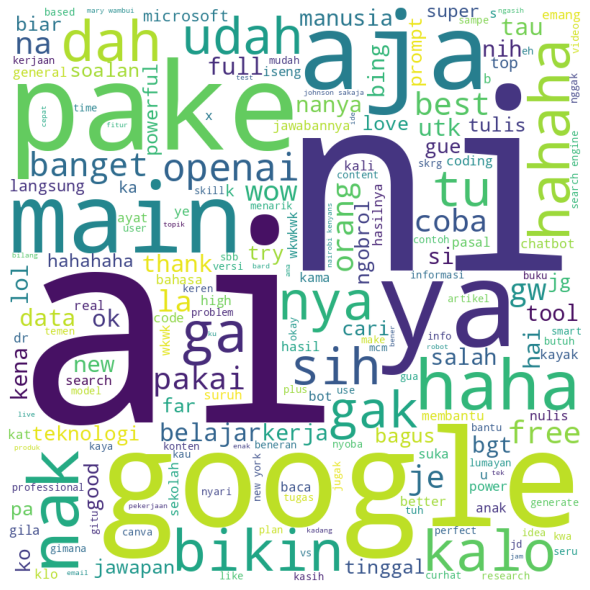

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


comment_words = ''
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df[df['Sentiment']=='Positive']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    
    if len(tokens)>=4:
      comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**10 kata yang paling sering muncul**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

comment_words = []
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df[df['Sentiment']=='Positive']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words.extend(tokens)
series = pd.Series(comment_words)
pd.DataFrame(series.value_counts().head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0
chatgpt,1692
ai,278
ni,211
main,136
google,132
pake,126
ya,124
haha,109
aja,105
nak,102


**Sentimen Netral**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


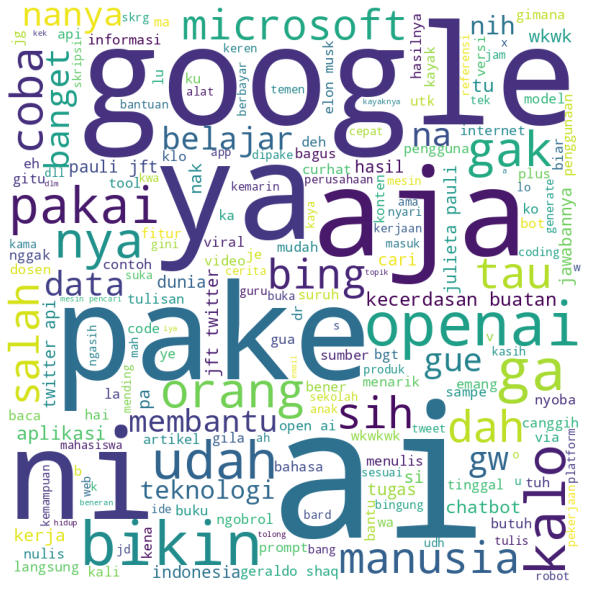

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


comment_words = ''
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df[df['Sentiment']=='Neutral']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    
    if len(tokens)>=4:
      comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**10 kata paling sering muncul**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

comment_words = []
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df[df['Sentiment']=='Neutral']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words.extend(tokens)
series = pd.Series(comment_words)
pd.DataFrame(series.value_counts().head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0
chatgpt,13904
ai,2062
google,1123
ya,882
pake,768
ni,701
openai,693
bikin,693
aja,620
ga,603


**Sentimen Negatif**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


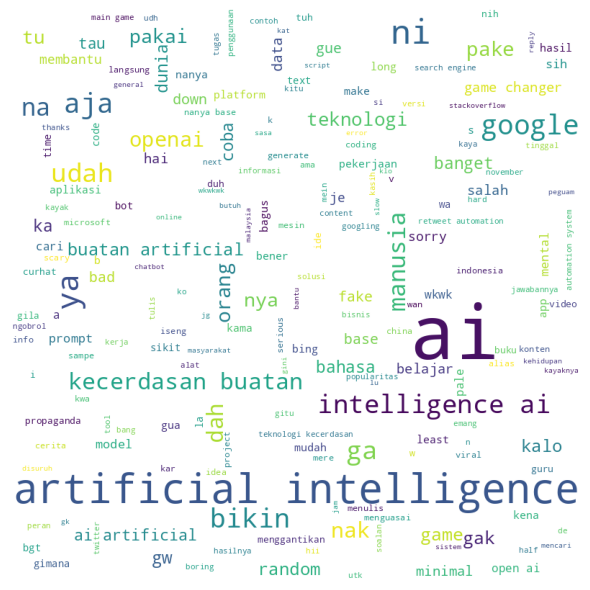

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


comment_words = ''
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df[df['Sentiment']=='Negative']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    
    if len(tokens)>=4:
      comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**10 kata yang paling sering muncul**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

comment_words = []
stopwords = list(stopwords.words('indonesian'))
stopwords.extend(['chatgpt', 'chat', 'gpt'])

for val in df[df['Sentiment']=='Negative']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words.extend(tokens)
series = pd.Series(comment_words)
pd.DataFrame(series.value_counts().head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0
chatgpt,565
ai,181
artificial,118
intelligence,106
ni,67
ya,53
aja,44
game,44
google,43
bikin,40


##**Bar Chart**##

**Distribusi Sentimen**

<function matplotlib.pyplot.show(close=None, block=None)>

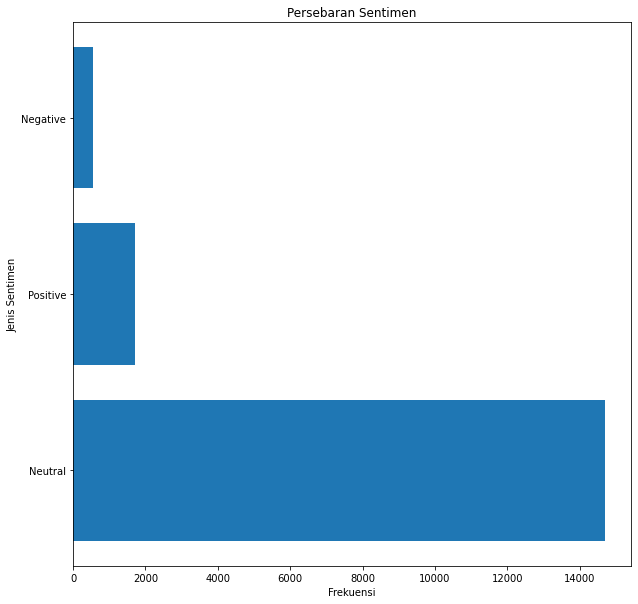

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(df['Sentiment'].value_counts().index, df['Sentiment'].value_counts().values)
plt.xlabel('Frekuensi')
plt.ylabel('Jenis Sentimen')
plt.title('Persebaran Sentimen')
plt.show

**Kata-kata yang paling banyak muncul**

**Sentimen Positif**

<function matplotlib.pyplot.show(close=None, block=None)>

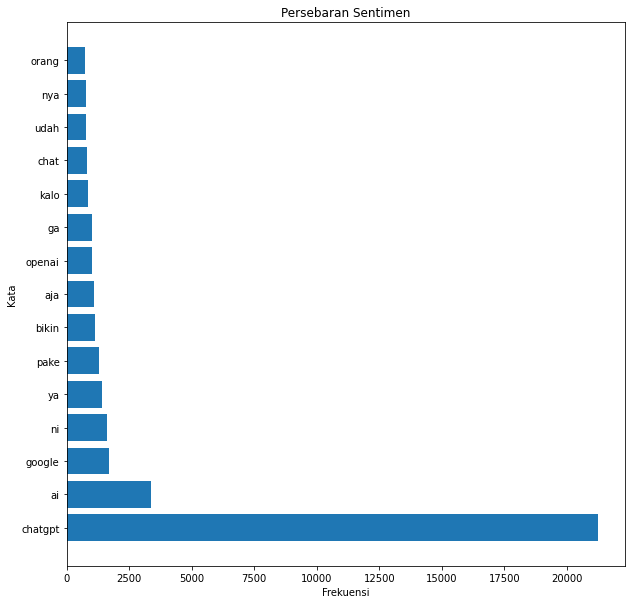

In [ ]:
for val in df[df['Sentiment']=='Positive']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words.extend(tokens)
series_pos = pd.Series(comment_words)

plt.figure(figsize=(10,10))
plt.barh(series_pos.value_counts().head(15).index, series_pos.value_counts().head(15).values)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Persebaran Sentimen')
plt.show

**Sentimen Netral**

<function matplotlib.pyplot.show(close=None, block=None)>

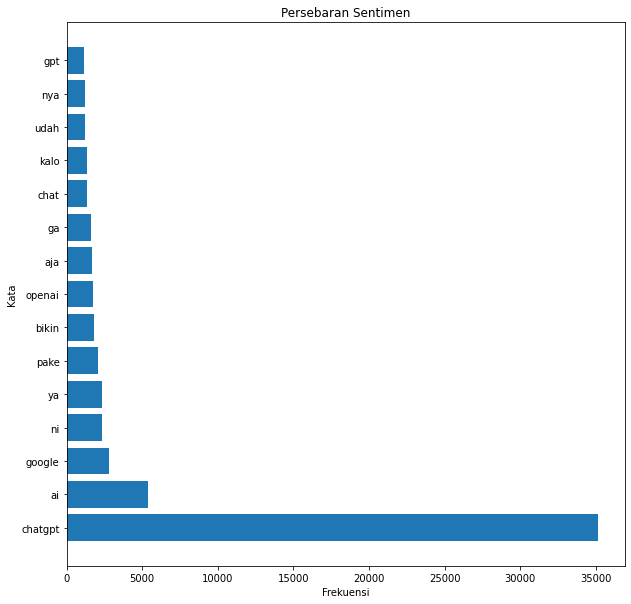

In [ ]:
for val in df[df['Sentiment']=='Neutral']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words.extend(tokens)
series_neu = pd.Series(comment_words)

plt.figure(figsize=(10,10))
plt.barh(series_neu.value_counts().head(15).index, series_neu.value_counts().head(15).values)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Persebaran Sentimen')
plt.show

**Sentimen Negatif**

<function matplotlib.pyplot.show(close=None, block=None)>

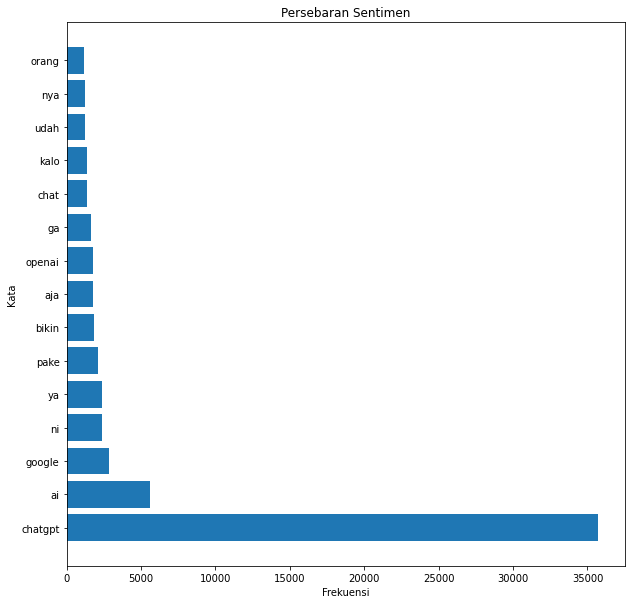

In [ ]:
for val in df[df['Sentiment']=='Negative']['Tweet']: 
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split() 
    comment_words.extend(tokens)
series_neg = pd.Series(comment_words)

plt.figure(figsize=(10,10))
plt.barh(series_neg.value_counts().head(15).index, series_neg.value_counts().head(15).values)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Persebaran Sentimen')
plt.show

##**Pie Chart**##

**Distribusi Sentimen**

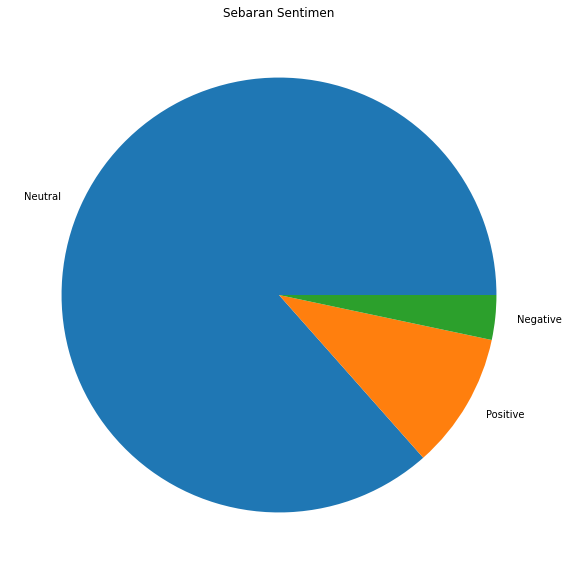

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df['Sentiment'].value_counts().values , labels = df['Sentiment'].value_counts().index)
plt.title('Sebaran Sentimen')
plt.show()

##**Rata-rata Panjang Kata**##

In [ ]:
a = df['Tweet'].str.len()
a

Date
2023-03-12 00:58:00     36.0
2023-03-11 21:14:00     71.0
2023-03-11 19:04:00    185.0
2023-03-11 18:03:00     31.0
2023-03-11 10:07:00     39.0
                       ...  
2022-12-01 15:51:00    133.0
2022-12-01 15:48:00    127.0
2022-12-01 15:45:00     42.0
2022-12-01 14:34:00     51.0
2023-03-02 01:24:00     13.0
Name: Tweet, Length: 16970, dtype: float64

In [ ]:
pd.Series(a.values).dropna()

0         36.0
1         71.0
2        185.0
3         31.0
4         39.0
         ...  
16965    133.0
16966    127.0
16967     42.0
16968     51.0
16969     13.0
Length: 16969, dtype: float64

In [ ]:
print(max(a.values), min(a.values))

279.0 1.0


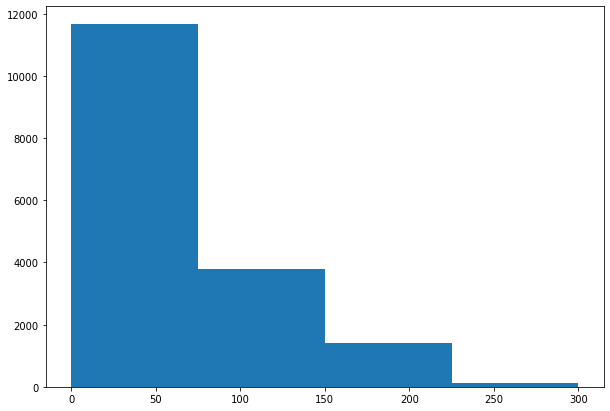

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a.values, bins = [0, 75, 150, 225, 300])
 
# Show plot
plt.show()

In [ ]:
b = df['Tweet'].str.split()
b

Date
2023-03-12 00:58:00          [chat, gpt, ni, membantu, penulisan, tugas]
2023-03-11 21:14:00    [gatau, berterimakasih, jd, ngerasa, males, ka...
2023-03-11 19:04:00    [ai, kecemasan, pekerjaan, kemunculan, chatgpt...
2023-03-11 18:03:00                 [wkwkwkwkwk, chatgpt, akumah, tugas]
2023-03-11 10:07:00      [chat, gpt, memudahkan, tugas, tugas, ku, hihi]
                                             ...                        
2022-12-01 15:51:00    [iyah, rindu, kpd, senior, eh, nya, kyk, berbu...
2022-12-01 15:48:00    [bgtu, abangnda, syarif, pan, nour, menghilang...
2022-12-01 15:45:00     [tatum, tunisia, kross, poland, chatgpt, nyimak]
2022-12-01 14:34:00    [chatgpt, making, rais, yatim, proud, boleh, c...
2023-03-02 01:24:00                                      [ai, vs, human]
Name: Tweet, Length: 16970, dtype: object

In [ ]:
for i in range(len(b)):
  print(b.values[i])

Streaminguitvoer ingekort tot de laatste 5000 regels.
['chatgpt', 'kemampuan', 'langkah', 'menggunakannya']
['chatgpt', 'aktif', 'diakses', 'ya', 'openai', 'ugm', 'fess']
['code', 'chatgpt', 'nggak', 'dimana', 'ya', 'coba', 'mintol', 'ai', 'editin', 'code']
['muak', 'banget', 'ama', 'chatgpt', 'udah', 'seminggu', 'ngobrol', 'ama', 'chatgpt', 'dapetin', 'best', 'prompts', 'output', 'want']
['chatgpt', 'kah', 'rha', 'wo', 'nhi', 'janta', 'firki', 'ko']
['last', 'weeks', 'kila', 'ninapojaribu', 'kutumia', 'chatgpt', 'inaniletea', 'creative', 'ways', 'za', 'kusema', 'huduma', 'haipo', 'we', 'bid', 'thee', 'adieu']
['baidu', 'mesin', 'pencari', 'cina', 'luncurkan', 'chatbot', 'chatgpt', 'airasia', 'super', 'app', 'bermitra', 'grup', 'manajemen', 'perhotelan', 'archipelago', 'international']
['chatgpt', 'simulation', 'iq']
['chatgpt', 'mengerti', 'doi']
['chatgpt', 'kalo', 'diliat', 'powerful', 'bgt', 'ya', 'bukti', 'ai', 'perkembangannya', 'cepet', 'banget', 'sebenernya', 'ya', 'bagus', 'me

##**Jumlah Tweet Berdasarkan Rentang Waktu**##

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace = True)
df

,Id,Username,Tweet,Raw
Date,,,,
2023-03-12 00:58:00,1.634610e+18,irfnannt,chat gpt ni membantu penulisan tugas,chat gpt ni sangat membantu dalam penulisan tu...
2023-03-11 21:14:00,1.634560e+18,poetrypetal,gatau berterimakasih jd ngerasa males kalo nge...,aku gatau harus berterimakasih atau jd ngerasa...
2023-03-11 19:04:00,1.634530e+18,ut_hkg,ai kecemasan pekerjaan kemunculan chatgpt dian...,AI dan Kecemasan Masa Depan Terhadap Pekerjaan...
2023-03-11 18:03:00,1.634510e+18,ailurost,wkwkwkwkwk chatgpt akumah tugas,@nealullaby @r__yld WKWKWKWKWK CHATGPT AKUMAH ...
2023-03-11 10:07:00,1.634390e+18,sevlgii,chat gpt memudahkan tugas tugas ku hihi,chat gpt memudahkan tugas tugas ku hihi
...,...,...,...,...
2022-12-01 15:51:00,1.598240e+18,annourcharity,iyah rindu kpd senior eh nya kyk berbulan bula...,@Siajapul Iyah.... Rindu kpd semua Senior eh.....
2022-12-01 15:48:00,1.598240e+18,annourcharity,bgtu abangnda syarif pan nour menghilang haria...,@Siajapul Bukan bgtu..... Abangnda Syarif @Sia...
2022-12-01 15:45:00,1.598240e+18,annourcharity,tatum tunisia kross poland chatgpt nyimak,@Siajapul #UmatBersatuRezimBisu\n#UmatBersatuR...


In [ ]:
from datetime import datetime
import pandas as pd
df['Date'] = df.index
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df

,Id,Username,Tweet,Raw,Date,Year,Month,Day,Hour,Minute
Date,,,,,,,,,,
2023-03-12 00:58:00,1.634610e+18,irfnannt,chat gpt ni membantu penulisan tugas,chat gpt ni sangat membantu dalam penulisan tu...,2023-03-12 00:58:00,2023,3,12,0,58
2023-03-11 21:14:00,1.634560e+18,poetrypetal,gatau berterimakasih jd ngerasa males kalo nge...,aku gatau harus berterimakasih atau jd ngerasa...,2023-03-11 21:14:00,2023,3,11,21,14
2023-03-11 19:04:00,1.634530e+18,ut_hkg,ai kecemasan pekerjaan kemunculan chatgpt dian...,AI dan Kecemasan Masa Depan Terhadap Pekerjaan...,2023-03-11 19:04:00,2023,3,11,19,4
2023-03-11 18:03:00,1.634510e+18,ailurost,wkwkwkwkwk chatgpt akumah tugas,@nealullaby @r__yld WKWKWKWKWK CHATGPT AKUMAH ...,2023-03-11 18:03:00,2023,3,11,18,3
2023-03-11 10:07:00,1.634390e+18,sevlgii,chat gpt memudahkan tugas tugas ku hihi,chat gpt memudahkan tugas tugas ku hihi,2023-03-11 10:07:00,2023,3,11,10,7
...,...,...,...,...,...,...,...,...,...,...
2022-12-01 15:51:00,1.598240e+18,annourcharity,iyah rindu kpd senior eh nya kyk berbulan bula...,@Siajapul Iyah.... Rindu kpd semua Senior eh.....,2022-12-01 15:51:00,2022,12,1,15,51
2022-12-01 15:48:00,1.598240e+18,annourcharity,bgtu abangnda syarif pan nour menghilang haria...,@Siajapul Bukan bgtu..... Abangnda Syarif @Sia...,2022-12-01 15:48:00,2022,12,1,15,48
2022-12-01 15:45:00,1.598240e+18,annourcharity,tatum tunisia kross poland chatgpt nyimak,@Siajapul #UmatBersatuRezimBisu\n#UmatBersatuR...,2022-12-01 15:45:00,2022,12,1,15,45


In [ ]:
df['hour_fix'] = [df['Hour'][i] if df['Minute'][i] < 30 else df['Hour'][i]+1 for i in range(len(df))]
df

,Id,Username,Tweet,Raw,Date,Year,Month,Day,Hour,Minute,hour_fix
Date,,,,,,,,,,,
2023-03-12 00:58:00,1.634610e+18,irfnannt,chat gpt ni membantu penulisan tugas,chat gpt ni sangat membantu dalam penulisan tu...,2023-03-12 00:58:00,2023,3,12,0,58,1
2023-03-11 21:14:00,1.634560e+18,poetrypetal,gatau berterimakasih jd ngerasa males kalo nge...,aku gatau harus berterimakasih atau jd ngerasa...,2023-03-11 21:14:00,2023,3,11,21,14,21
2023-03-11 19:04:00,1.634530e+18,ut_hkg,ai kecemasan pekerjaan kemunculan chatgpt dian...,AI dan Kecemasan Masa Depan Terhadap Pekerjaan...,2023-03-11 19:04:00,2023,3,11,19,4,19
2023-03-11 18:03:00,1.634510e+18,ailurost,wkwkwkwkwk chatgpt akumah tugas,@nealullaby @r__yld WKWKWKWKWK CHATGPT AKUMAH ...,2023-03-11 18:03:00,2023,3,11,18,3,18
2023-03-11 10:07:00,1.634390e+18,sevlgii,chat gpt memudahkan tugas tugas ku hihi,chat gpt memudahkan tugas tugas ku hihi,2023-03-11 10:07:00,2023,3,11,10,7,10
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01 15:51:00,1.598240e+18,annourcharity,iyah rindu kpd senior eh nya kyk berbulan bula...,@Siajapul Iyah.... Rindu kpd semua Senior eh.....,2022-12-01 15:51:00,2022,12,1,15,51,16
2022-12-01 15:48:00,1.598240e+18,annourcharity,bgtu abangnda syarif pan nour menghilang haria...,@Siajapul Bukan bgtu..... Abangnda Syarif @Sia...,2022-12-01 15:48:00,2022,12,1,15,48,16
2022-12-01 15:45:00,1.598240e+18,annourcharity,tatum tunisia kross poland chatgpt nyimak,@Siajapul #UmatBersatuRezimBisu\n#UmatBersatuR...,2022-12-01 15:45:00,2022,12,1,15,45,16


In [ ]:
df.drop(['Raw', 'Hour'], axis=1, inplace = True)
df

,Id,Username,Tweet,Date,Year,Month,Day,Minute,hour_fix
Date,,,,,,,,,
2023-03-12 00:58:00,1.634610e+18,irfnannt,chat gpt ni membantu penulisan tugas,2023-03-12 00:58:00,2023,3,12,58,1
2023-03-11 21:14:00,1.634560e+18,poetrypetal,gatau berterimakasih jd ngerasa males kalo nge...,2023-03-11 21:14:00,2023,3,11,14,21
2023-03-11 19:04:00,1.634530e+18,ut_hkg,ai kecemasan pekerjaan kemunculan chatgpt dian...,2023-03-11 19:04:00,2023,3,11,4,19
2023-03-11 18:03:00,1.634510e+18,ailurost,wkwkwkwkwk chatgpt akumah tugas,2023-03-11 18:03:00,2023,3,11,3,18
2023-03-11 10:07:00,1.634390e+18,sevlgii,chat gpt memudahkan tugas tugas ku hihi,2023-03-11 10:07:00,2023,3,11,7,10
...,...,...,...,...,...,...,...,...,...
2022-12-01 15:51:00,1.598240e+18,annourcharity,iyah rindu kpd senior eh nya kyk berbulan bula...,2022-12-01 15:51:00,2022,12,1,51,16
2022-12-01 15:48:00,1.598240e+18,annourcharity,bgtu abangnda syarif pan nour menghilang haria...,2022-12-01 15:48:00,2022,12,1,48,16
2022-12-01 15:45:00,1.598240e+18,annourcharity,tatum tunisia kross poland chatgpt nyimak,2022-12-01 15:45:00,2022,12,1,45,16


**Year**

In [ ]:
key = []
for i in df['Year'].unique():
  key.append(len(df[df['Year']==i]['Tweet']))

print(key)

[14197, 2773]


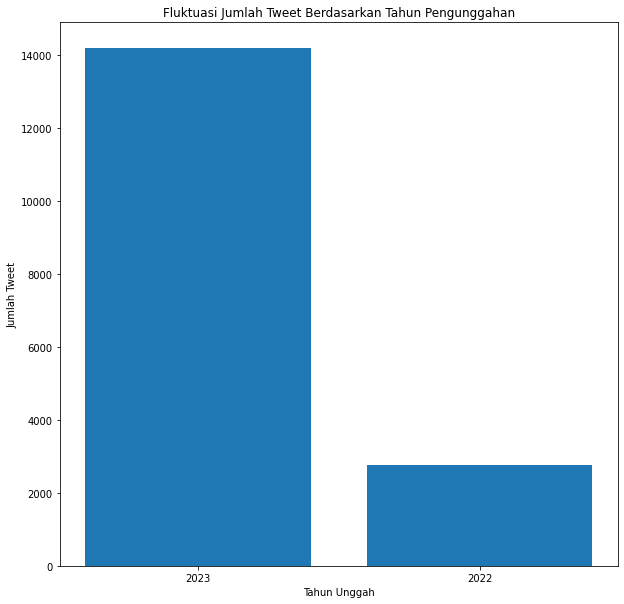

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.bar(df['Year'].unique().astype(str), key)
plt.title('Fluktuasi Jumlah Tweet Berdasarkan Tahun Pengunggahan')
plt.xlabel('Tahun Unggah')
plt.ylabel('Jumlah Tweet')
plt.show()

**Month**

[2395, 7956, 3846, 2773]


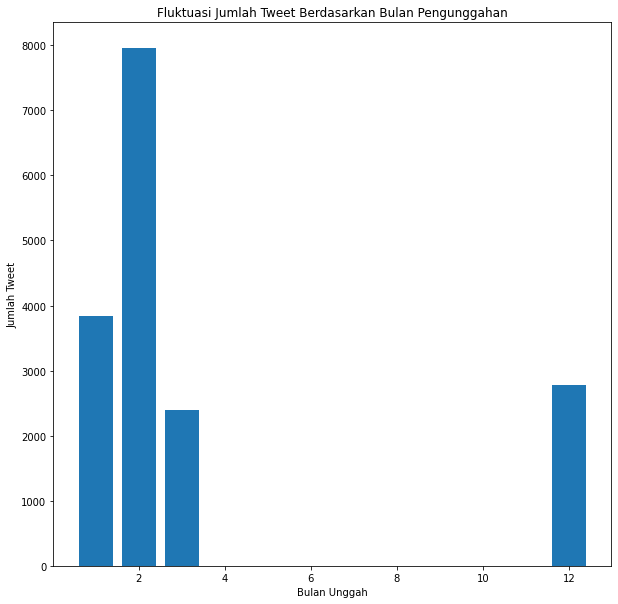

In [ ]:
key = []
for i in df['Month'].unique():
  key.append(len(df[df['Month']==i]['Tweet']))
print(key)

plt.figure(figsize=(10,10))
plt.bar(df['Month'].unique(), key)
plt.title('Fluktuasi Jumlah Tweet Berdasarkan Bulan Pengunggahan')
plt.xlabel('Bulan Unggah')
plt.ylabel('Jumlah Tweet')
plt.show()

**Day**

[487, 707, 738, 777, 920, 843, 669, 588, 634, 810, 519, 454, 460, 457, 464, 538, 536, 405, 444, 456, 455, 620, 463, 499, 511, 543, 763, 238, 239, 248, 485]


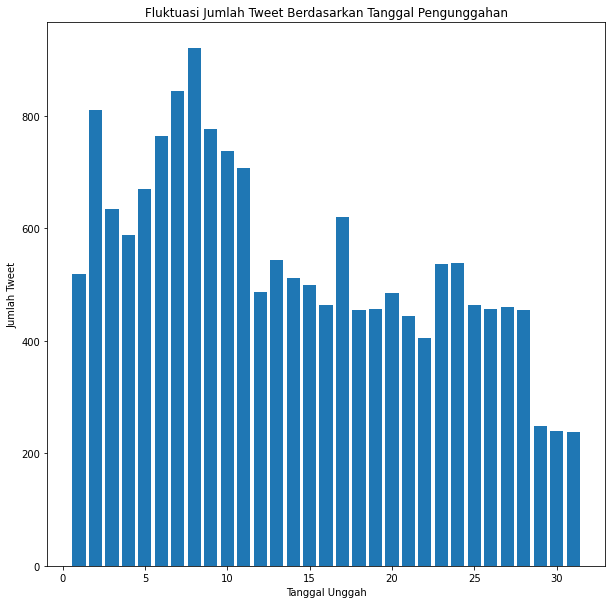

In [ ]:
key = []
for i in df['Day'].unique():
  key.append(len(df[df['Day']==i]['Tweet']))
print(key)

plt.figure(figsize=(10,10))
plt.bar(df['Day'].unique(), key)
plt.title('Fluktuasi Jumlah Tweet Berdasarkan Tanggal Pengunggahan')
plt.xlabel('Tanggal Unggah')
plt.ylabel('Jumlah Tweet')
plt.show()

**Hour**

[510, 938, 935, 977, 872, 579, 901, 701, 997, 295, 941, 1062, 298, 935, 922, 907, 327, 775, 846, 828, 398, 198, 219, 353, 256]


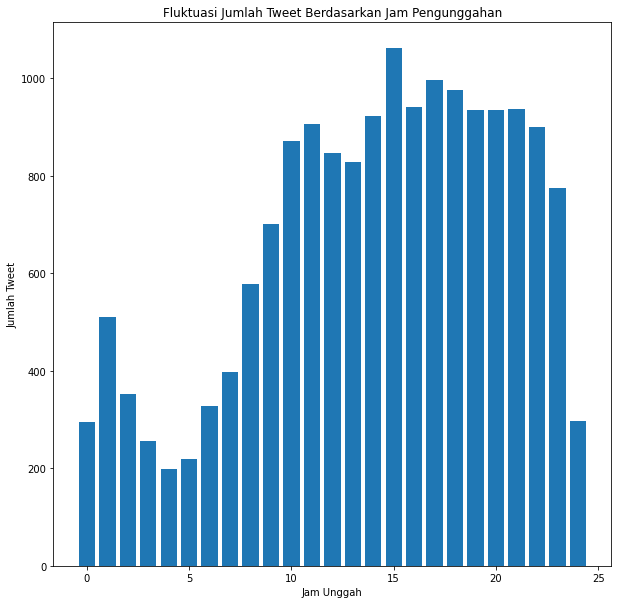

In [ ]:
key = []
for i in df['hour_fix'].unique():
  key.append(len(df[df['hour_fix']==i]['Tweet']))
print(key)

plt.figure(figsize=(10,10))
plt.bar(df['hour_fix'].unique(), key)
plt.title('Fluktuasi Jumlah Tweet Berdasarkan Jam Pengunggahan')
plt.xlabel('Jam Unggah')
plt.ylabel('Jumlah Tweet')
plt.show()

**Monthly**

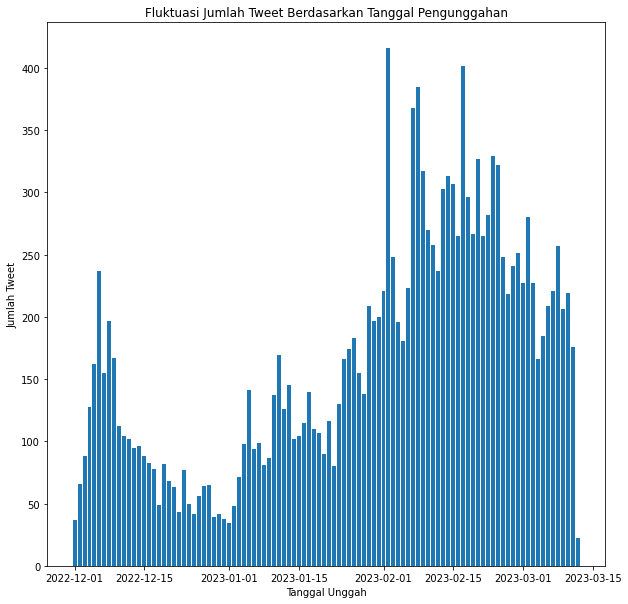

In [ ]:
import matplotlib.pyplot as plt

key = []
for i in df.Date.unique():
  key.append(len(df[df['Date']==i]['Tweet']))

plt.figure(figsize=(10,10))
plt.bar(df['Date'].unique(), key)
plt.title('Fluktuasi Jumlah Tweet Berdasarkan Tanggal Pengunggahan')
plt.xlabel('Tanggal Unggah')
plt.ylabel('Jumlah Tweet')
plt.show()

In [ ]:
from datetime import datetime
from datetime import date
 
def rem_time(d):
    s = date(d.year,d.month, d.day)
    return s

df['Date'] = df['Date'].apply(rem_time)
df

,Id,Username,Tweet,Date,Year,Month,Day,Minute,hour_fix
Date,,,,,,,,,
2023-03-12 00:58:00,1.634610e+18,irfnannt,chat gpt ni membantu penulisan tugas,2023-03-12,2023,3,12,58,1
2023-03-11 21:14:00,1.634560e+18,poetrypetal,gatau berterimakasih jd ngerasa males kalo nge...,2023-03-11,2023,3,11,14,21
2023-03-11 19:04:00,1.634530e+18,ut_hkg,ai kecemasan pekerjaan kemunculan chatgpt dian...,2023-03-11,2023,3,11,4,19
2023-03-11 18:03:00,1.634510e+18,ailurost,wkwkwkwkwk chatgpt akumah tugas,2023-03-11,2023,3,11,3,18
2023-03-11 10:07:00,1.634390e+18,sevlgii,chat gpt memudahkan tugas tugas ku hihi,2023-03-11,2023,3,11,7,10
...,...,...,...,...,...,...,...,...,...
2022-12-01 15:51:00,1.598240e+18,annourcharity,iyah rindu kpd senior eh nya kyk berbulan bula...,2022-12-01,2022,12,1,51,16
2022-12-01 15:48:00,1.598240e+18,annourcharity,bgtu abangnda syarif pan nour menghilang haria...,2022-12-01,2022,12,1,48,16
2022-12-01 15:45:00,1.598240e+18,annourcharity,tatum tunisia kross poland chatgpt nyimak,2022-12-01,2022,12,1,45,16


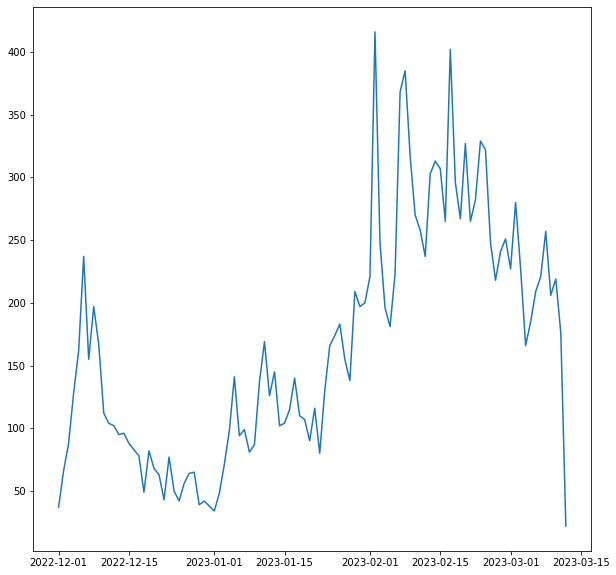

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.lineplot( x = df["Date"].unique(),y = key)
plt.show()